In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import os

In [2]:
pd.set_option('display.max_rows', 25)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [3]:
def read_csv_in_folder_and_fill_nans(path_to_folder, verbose):
    file_in_folder = [file for file in os.listdir(path_to_folder) if os.path.isfile(os.path.join(path_to_folder, file))]

    dataframe_list = []
    for file in file_in_folder:
        temp_df = pd.read_csv(path_to_folder+"/"+file)
        temp_df.insert(0, 'Index', [index for index in range(len(temp_df))])
        temp_df = temp_df.fillna(0)
        dataframe_list.append(temp_df)
        if verbose:
            print(temp_df)

    if verbose:
        print(f"\nProcessed {len(file_in_folder)} files {file_in_folder} from folder '{path_to_folder}' ")
    return dataframe_list

In [4]:
dataframe_list_original = read_csv_in_folder_and_fill_nans("files/example", True)

     Index Input                                    Time   Latitude  Longitude       Pitch         Yaw       Roll  Status
0        0  SMAR  2023-04-04 12:33:20:109 GMT+02:00 2023  46.089928  11.115853    0.000000    0.000000   0.000000     0.0
1        1  STON  2023-04-04 12:33:20:136 GMT+02:00 2023  46.089800  11.115509    0.019088  121.168472  -0.023919     1.0
2        2  STON  2023-04-04 12:33:20:227 GMT+02:00 2023  46.089800  11.115509    0.080942  121.437714  -0.039270     1.0
3        3  STON  2023-04-04 12:33:20:376 GMT+02:00 2023  46.089800  11.115509    0.178474  121.063713  -0.048813     1.0
4        4  STON  2023-04-04 12:33:20:591 GMT+02:00 2023  46.089800  11.115509    0.281898  120.783051  -0.138419     1.0
..     ...   ...                                     ...        ...        ...         ...         ...        ...     ...
459    459  SMAR  2023-04-04 12:33:33:237 GMT+02:00 2023  46.089824  11.115705  285.820000   37.560000  85.100000     0.0
460    460  SMAR  2023-0

In [5]:
def clean_dataframe(dataframe_list, verbose):
    cleaned_dataframe_list = []
    for df_index, df in enumerate(dataframe_list):
        for row in range(len(df)):
            if df.loc[row, 'Pitch'] == 0 and df.loc[row, 'Yaw'] == 0 and df.loc[row, 'Roll'] == 0 :
                df = df.drop([row], axis=0) # This is a copy
            elif df.loc[row, 'Latitude'] == 0 or df.loc[row, 'Longitude'] == 0:
                df = df.drop([row], axis=0) # This is a copy
            #TODO: add other cases linked with not sufficient accuracy...
            else:
                df.loc[row,'Time'] = df.loc[row,'Time'][0:23]
        df = df.reset_index(drop=True)
        cleaned_dataframe_list.append(df) # So we need to reassign the new modified copy to the original list

    if verbose:
        for clean_df in cleaned_dataframe_list:
            print(clean_df)
    return cleaned_dataframe_list

In [6]:
dataframe_list_cleaned = clean_dataframe(dataframe_list_original, True)

     Index Input                     Time   Latitude  Longitude       Pitch         Yaw       Roll  Status
0        1  STON  2023-04-04 12:33:20:136  46.089800  11.115509    0.019088  121.168472  -0.023919     1.0
1        2  STON  2023-04-04 12:33:20:227  46.089800  11.115509    0.080942  121.437714  -0.039270     1.0
2        3  STON  2023-04-04 12:33:20:376  46.089800  11.115509    0.178474  121.063713  -0.048813     1.0
3        4  STON  2023-04-04 12:33:20:591  46.089800  11.115509    0.281898  120.783051  -0.138419     1.0
4        5  STON  2023-04-04 12:33:20:791  46.089800  11.115509    0.370724  120.852341  -0.247907     1.0
..     ...   ...                      ...        ...        ...         ...         ...        ...     ...
446    459  SMAR  2023-04-04 12:33:33:237  46.089824  11.115705  285.820000   37.560000  85.100000     0.0
447    460  SMAR  2023-04-04 12:33:33:271  46.089824  11.115705  286.870000   36.340000  85.130000     0.0
448    461  STON  2023-04-04 12:33:33

In [7]:
def separate_stonex_smartphone_data(dataframe_list, verbose):
    stonex_dataframe_list = []
    smartphone_dataframe_list = []
    joint_time_dataframe_list = []
    for df in dataframe_list:
        temp_stonex_df = pd.DataFrame(columns=df.columns)
        temp_smartphone_df = pd.DataFrame(columns=df.columns)

        for row in range(len(df)):
            if df.loc[row, 'Input'] == "STON":
                temp_stonex_df.loc[row] = df.iloc[row]
            elif df.loc[row, 'Input'] == "SMAR":
                temp_smartphone_df.loc[row] = df.iloc[row]

        temp_stonex_df.reset_index(drop=True)
        temp_smartphone_df.reset_index(drop=True)

        joint_time_dataframe_list.append(df['Time'])

        stonex_dataframe_list.append(temp_stonex_df)
        smartphone_dataframe_list.append(temp_smartphone_df)
        if verbose:
            print(temp_stonex_df)
            print(temp_smartphone_df)
            print(df['Time'])

    return stonex_dataframe_list, smartphone_dataframe_list, joint_time_dataframe_list

In [31]:
stonex_dataframe_list, smartphone_dataframe_list, joint_time_dataframe_list = separate_stonex_smartphone_data(dataframe_list_cleaned, True)

    Index Input                     Time Latitude  Longitude     Pitch         Yaw      Roll Status
0       1  STON  2023-04-04 12:33:20:136  46.0898  11.115509  0.019088  121.168472 -0.023919    1.0
1       2  STON  2023-04-04 12:33:20:227  46.0898  11.115509  0.080942  121.437714  -0.03927    1.0
2       3  STON  2023-04-04 12:33:20:376  46.0898  11.115509  0.178474  121.063713 -0.048813    1.0
3       4  STON  2023-04-04 12:33:20:591  46.0898  11.115509  0.281898  120.783051 -0.138419    1.0
4       5  STON  2023-04-04 12:33:20:791  46.0898  11.115509  0.370724  120.852341 -0.247907    1.0
..    ...   ...                      ...      ...        ...       ...         ...       ...    ...
431   444  STON  2023-04-04 12:33:32:851  46.0898  11.115509  0.796309  154.077393 -0.896764    1.0
434   447  STON  2023-04-04 12:33:32:917  46.0898  11.115509  0.796309  154.077393 -0.896764    1.0
435   448  STON  2023-04-04 12:33:32:919  46.0898  11.115509  1.132222  153.429901 -1.105312    1.0


In [ ]:
# We need to invert the polarity of the stonex yaw, and to add 180 degrees to move it from [-180,180]° to  [0,360]°
for dataframe in stonex_dataframe_list:
    for row in range(len(dataframe)):
        dataframe.iloc[row,6] = -dataframe.iloc[row,6] + 180

In [33]:
def plot_data_over_time(stonex_dataframe, smartphone_dataframe, joint_time_dataframe, full_data=False, n_ticks=25):
    parameters = ["Pitch","Yaw","Roll"]
    parameters_extension = ["Latitude","Longitude"]
    if full_data:
        parameters.extend(parameters_extension)
    n_rows = len(parameters)

    fig, ax_list = plt.subplots(nrows=n_rows)
    for param_index, parameter in enumerate(parameters):
        ax_list[param_index].plot(stonex_dataframe['Index'], stonex_dataframe[parameter], label="Stonex")
        ax_list[param_index].plot(smartphone_dataframe['Index'], smartphone_dataframe[parameter], label="Smartphone")

        ax_list[param_index].set_title(f"'{parameter}' over time")
        ax_list[param_index].legend()
        if parameter not in parameters_extension:
            ax_list[param_index].set_ylabel("Degrees")
        else:
            for index, extra_parameter in enumerate(parameters_extension):
                if extra_parameter == parameters_extension[index]:
                    ax_list[param_index].set_ylabel(parameters_extension[index])
                    break

        # ax_list[param_index].locator_params(axis='x', nbins=1)
        ax_list[param_index].set_xticks([i for i in range(len(joint_time_dataframe))], joint_time_dataframe.to_list(), rotation=45)

        ticks_freq = int(len(joint_time_dataframe)/n_ticks)
        for n, label in enumerate(ax_list[param_index].xaxis.get_ticklabels()):
            if n % ticks_freq != 0:
                label.set_visible(False)

    fig.autofmt_xdate()
    fig.set_figwidth(15)
    fig.set_figheight(5*n_rows)
    # fig.subplots_adjust(hspace=1.2)
    plt.show()

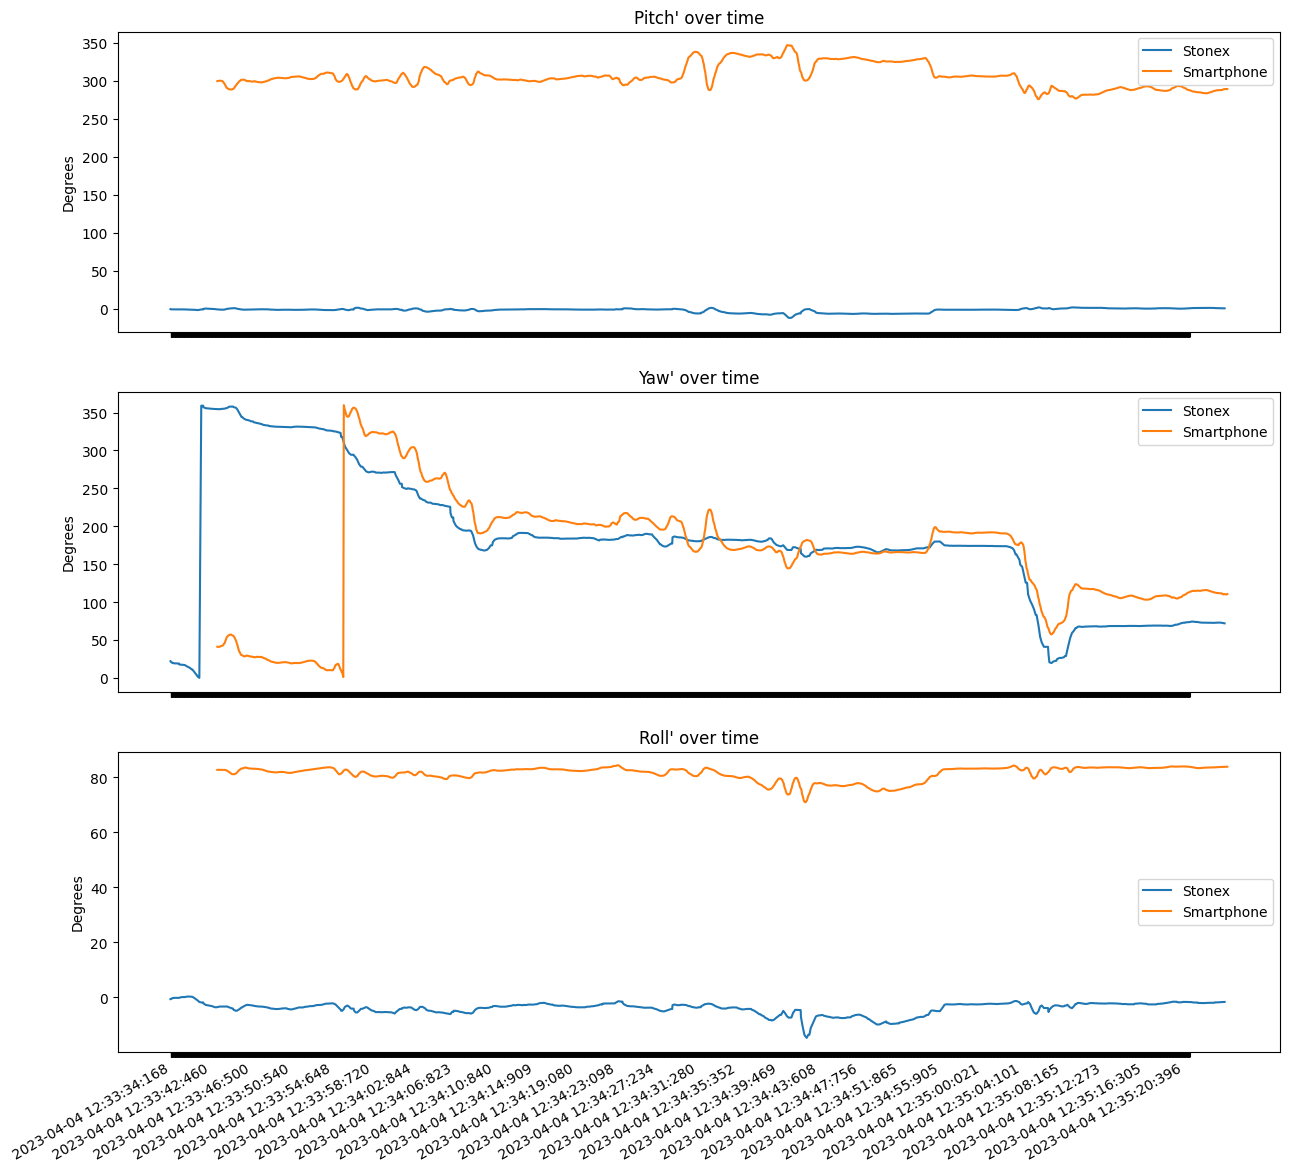

In [34]:
plot_data_over_time(stonex_dataframe_list[1], smartphone_dataframe_list[1], joint_time_dataframe_list[1], False)

In [35]:
def plot_list_data_over_time(stonex_dataframe_list, smartphone_dataframe_list, joint_time_dataframe_list, full_data=False, n_ticks=25):
    assert len(stonex_dataframe_list) == len(smartphone_dataframe_list), "The lists must encompass the same number of dataframes to carry out the comparison"

    ax_list = []
    parameters = ["Pitch","Yaw","Roll"]
    parameters_extension = ["Latitude","Longitude"]
    if full_data:
        parameters.extend(parameters_extension)
    n_rows = len(parameters)

    for df in range(len(stonex_dataframe_list)):
        fig, ax_list = plt.subplots(nrows=n_rows)
        for param_index, parameter in enumerate(parameters):
            ax_list[param_index].plot(stonex_dataframe_list[df]['Index'], stonex_dataframe_list[df][parameter], label="Stonex")
            ax_list[param_index].plot(smartphone_dataframe_list[df]['Index'], smartphone_dataframe_list[df][parameter], label="Smartphone")

            ax_list[param_index].set_title(f"File {df}: '{parameter}' over time")
            ax_list[param_index].legend()
            if parameter not in parameters_extension:
                ax_list[param_index].set_ylabel("Degrees")
            else:
                for index, extra_parameter in enumerate(parameters_extension):
                    if extra_parameter == parameters_extension[index]:
                        ax_list[param_index].set_ylabel(parameters_extension[index])
                        break

            # ax_list[param_index].locator_params(axis='x', nbins=1)
            ax_list[param_index].set_xticks([i for i in range(len(joint_time_dataframe_list[df]))], joint_time_dataframe_list[df].to_list(), rotation=45)

            ticks_freq = int(len(joint_time_dataframe_list[df])/n_ticks)
            for n, label in enumerate(ax_list[param_index].xaxis.get_ticklabels()):
                if n % ticks_freq != 0:
                    label.set_visible(False)

        fig.autofmt_xdate()
        fig.set_figwidth(15)
        fig.set_figheight(5*n_rows)
        # fig.subplots_adjust(hspace=1.2)
        plt.show()

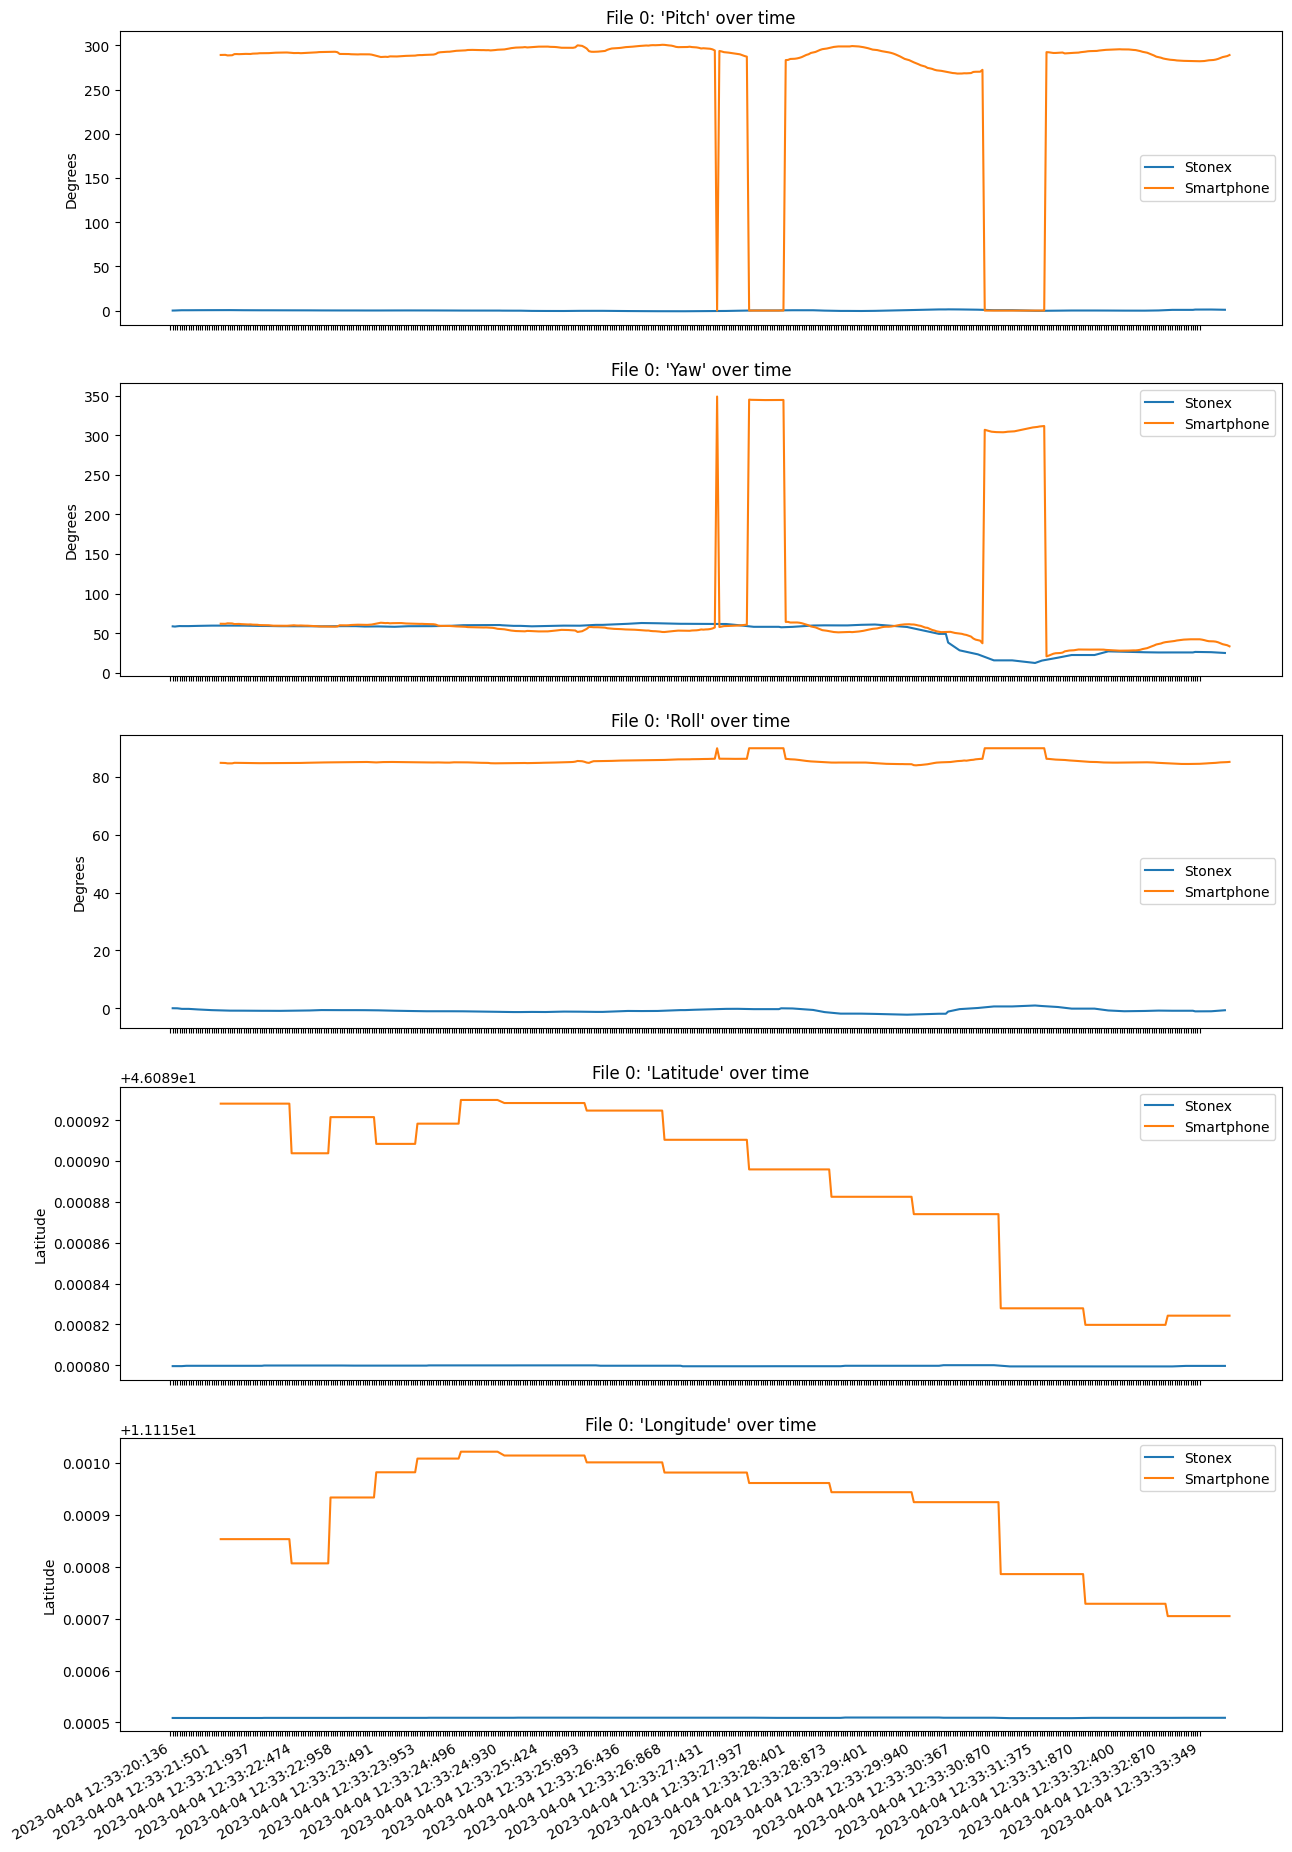

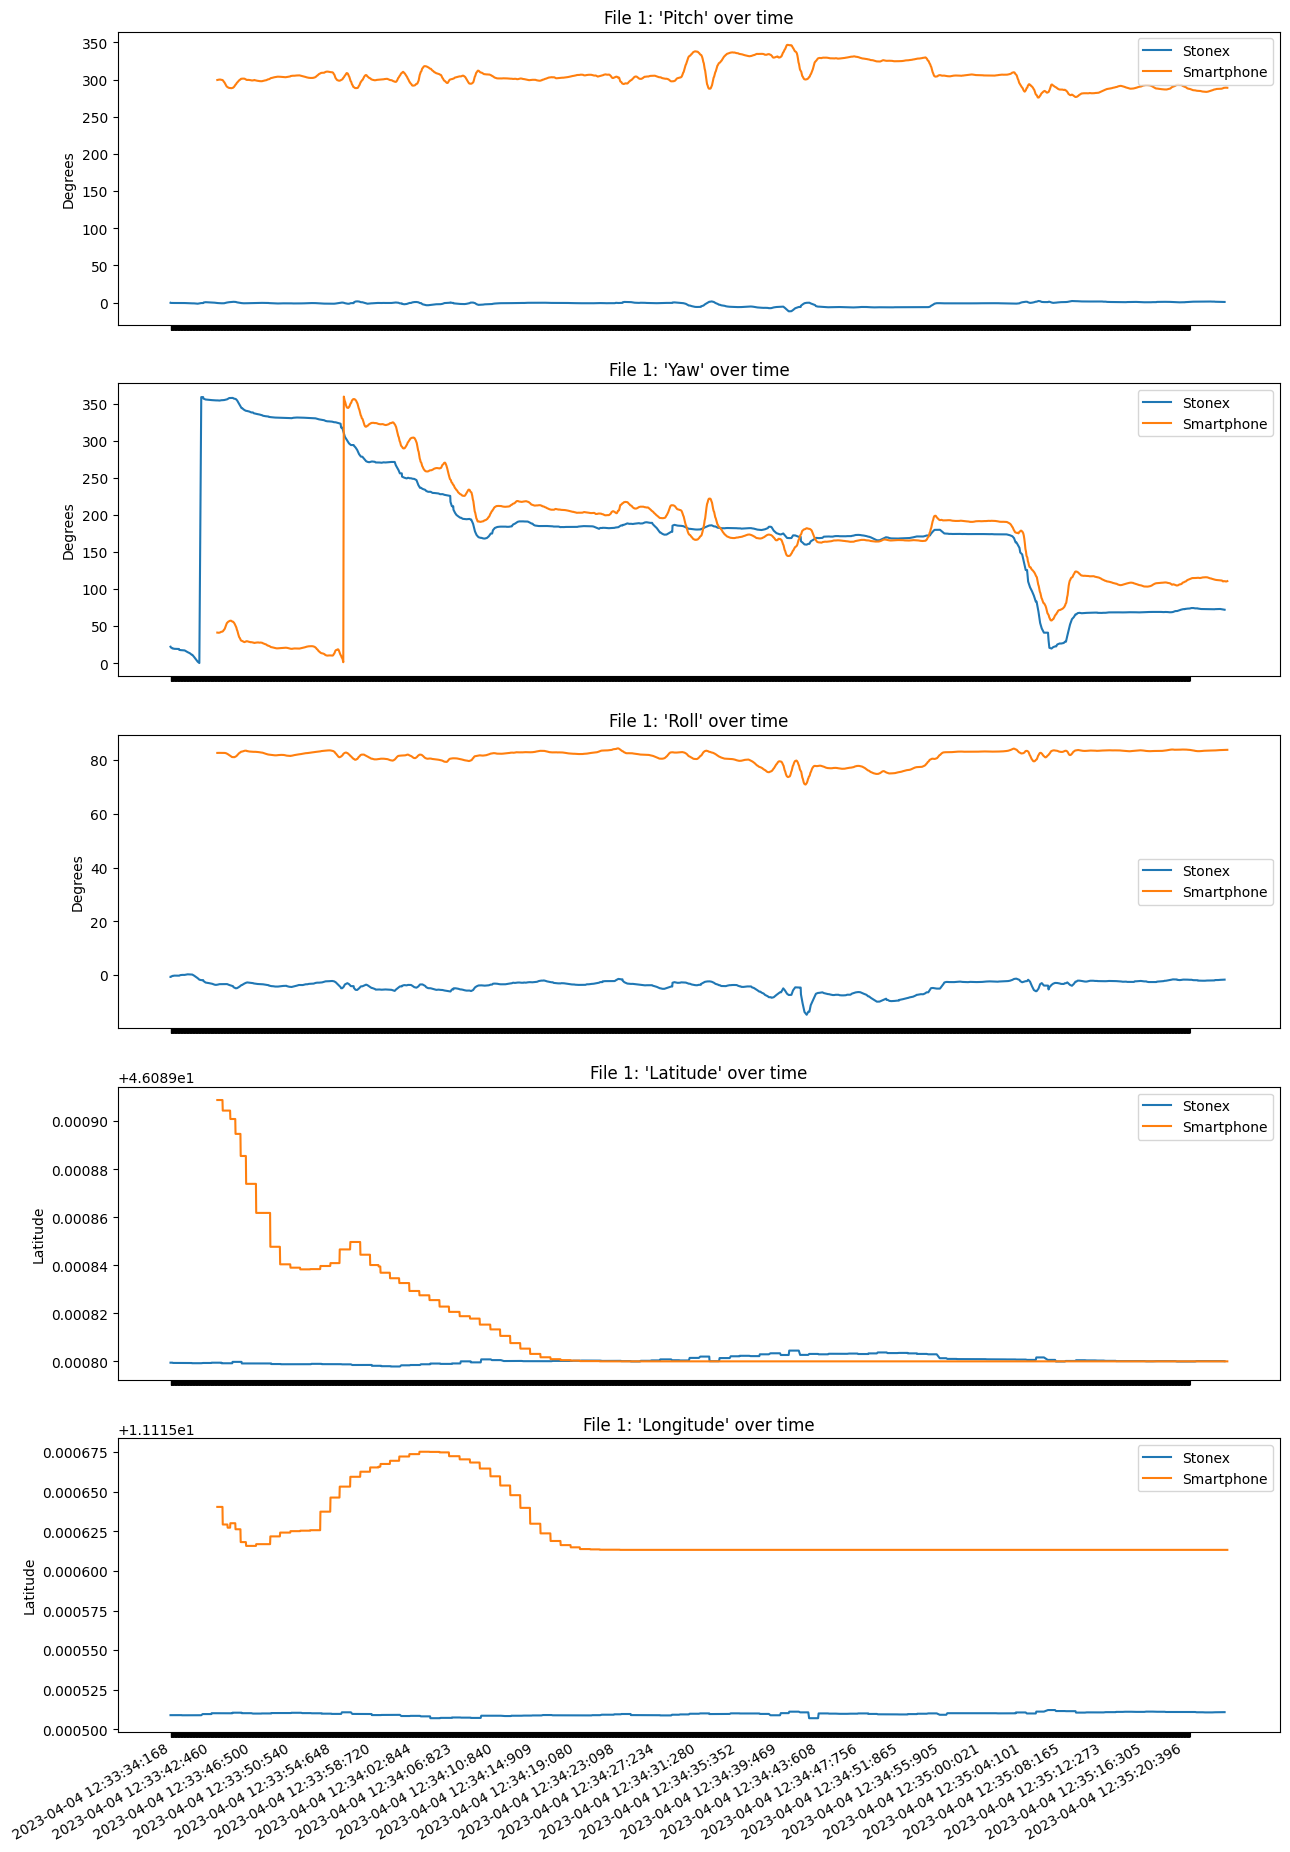

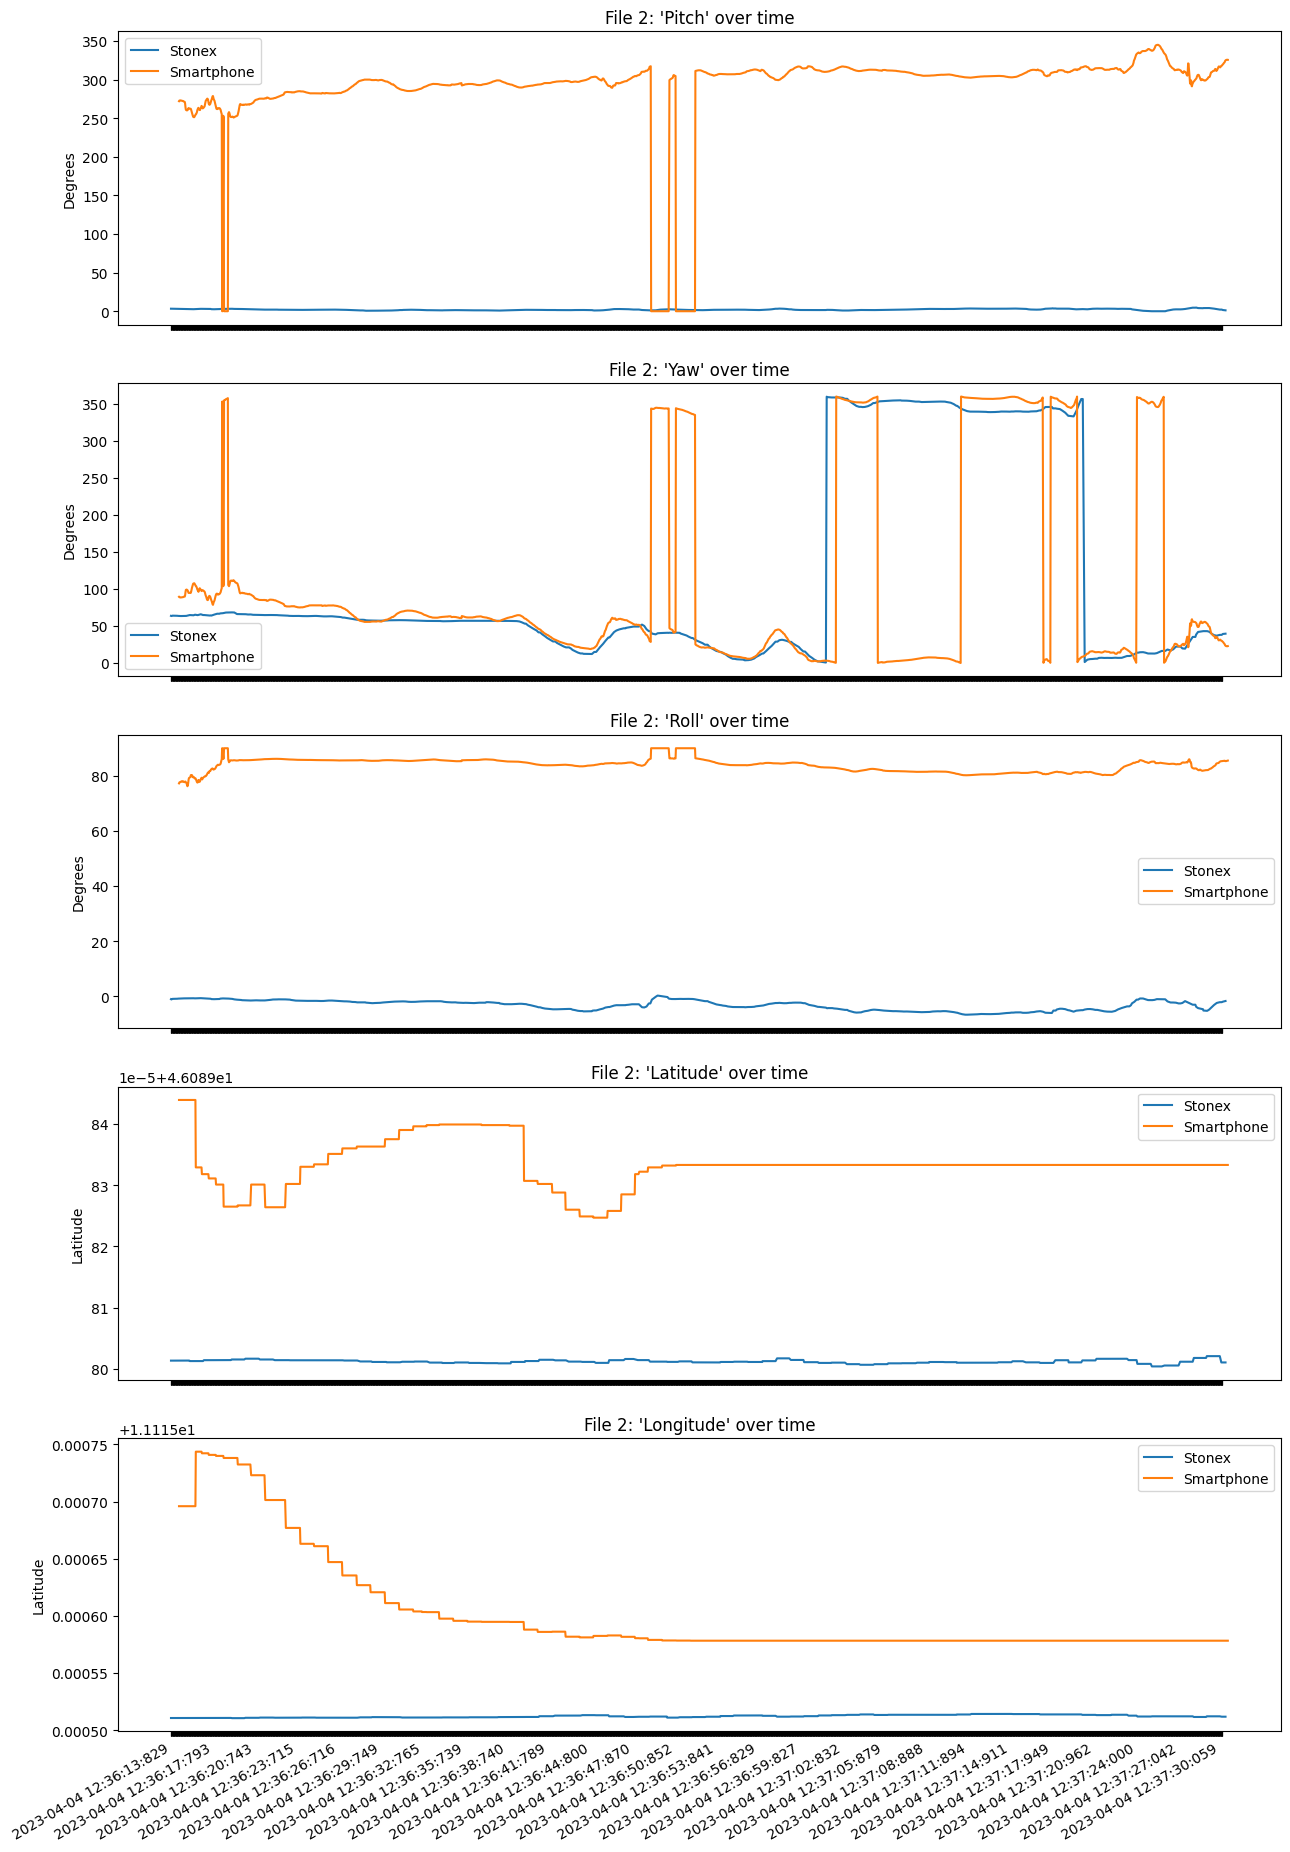

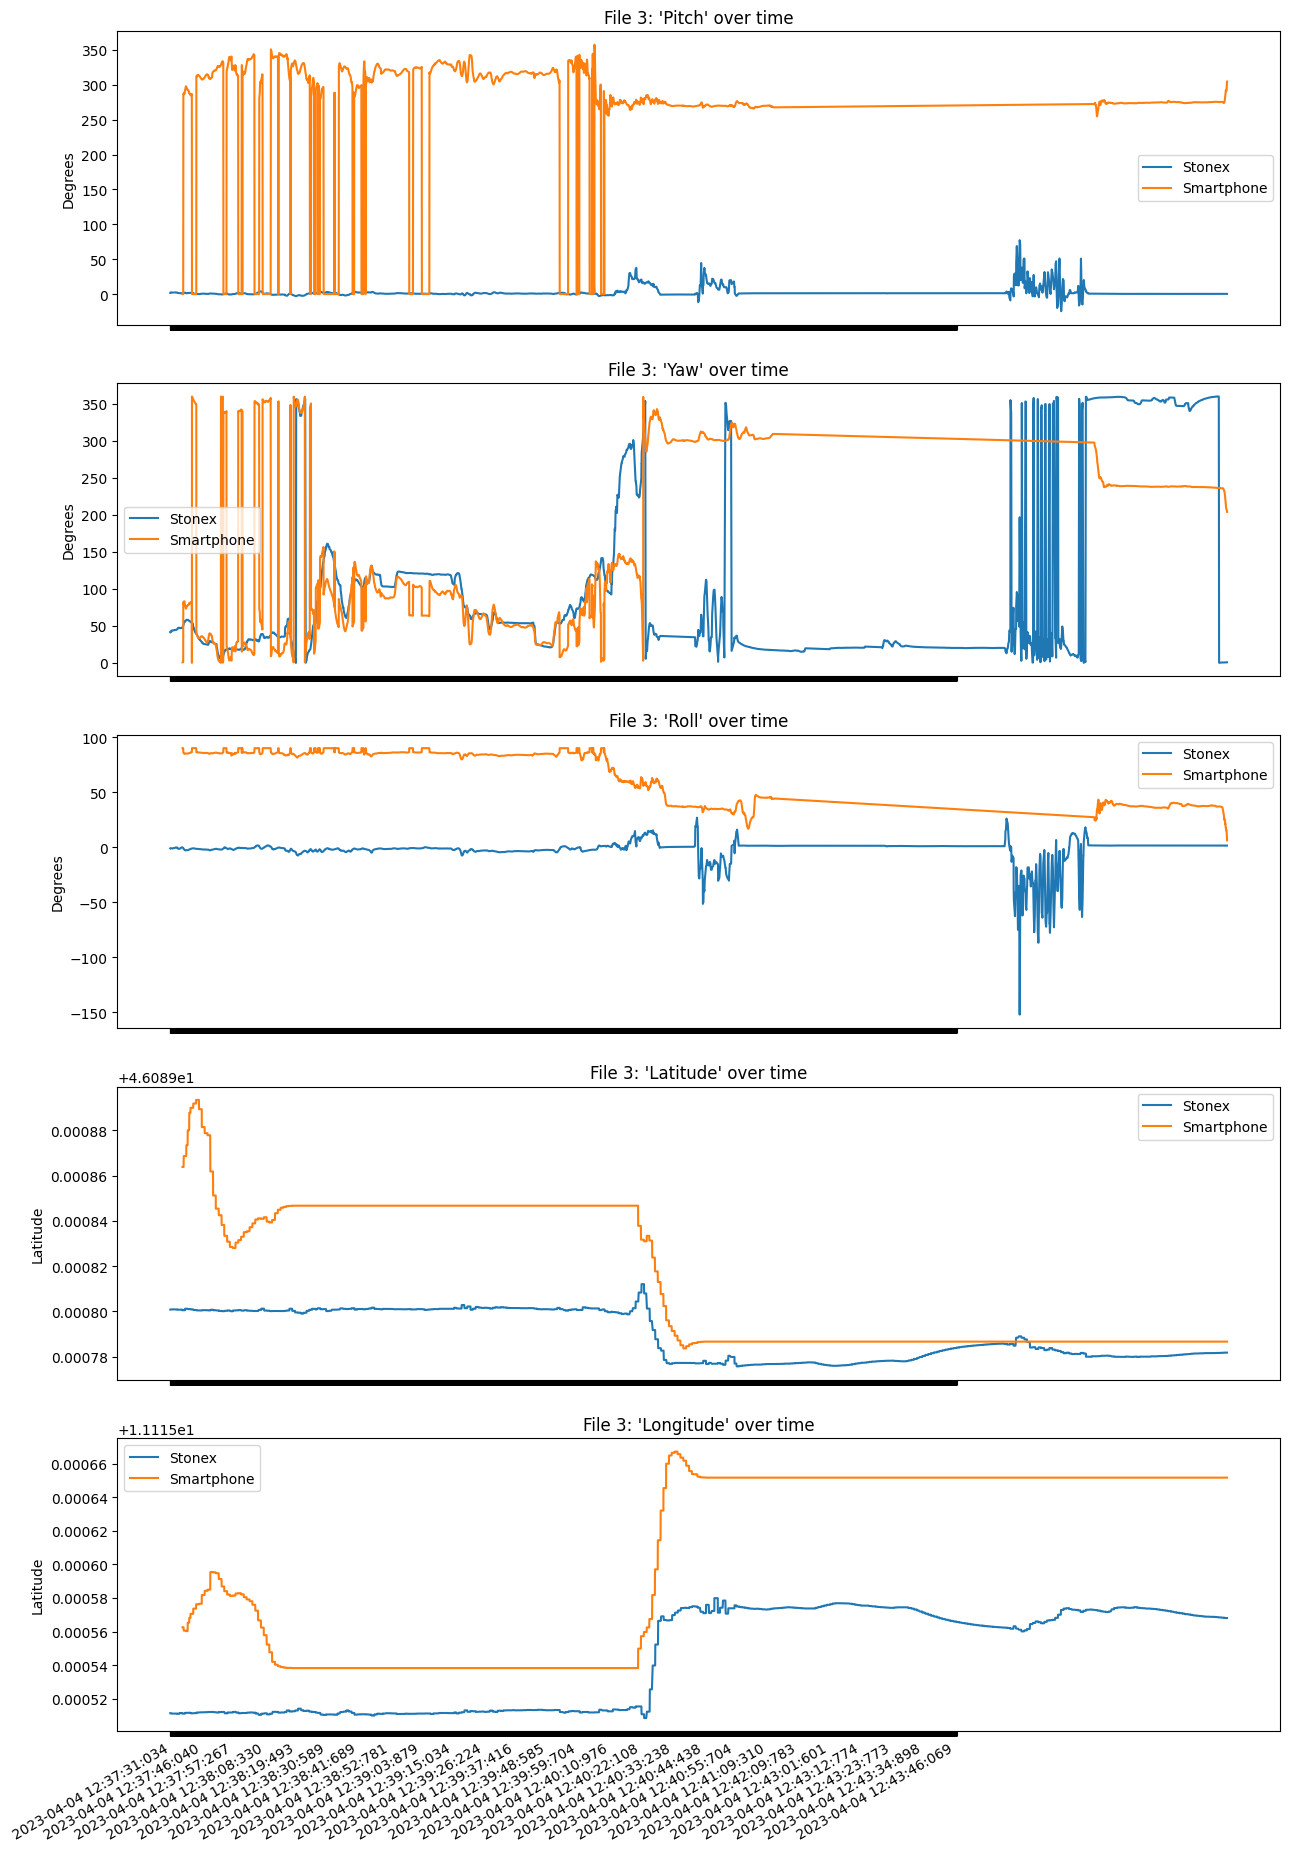

In [36]:
plot_list_data_over_time(stonex_dataframe_list, smartphone_dataframe_list, joint_time_dataframe_list, True)

In [37]:
def scatter_latitude_longitude_data(stonex_dataframe_list, smartphone_dataframe_list):
    assert len(stonex_dataframe_list) == len(smartphone_dataframe_list), "The lists must encompass the same number of dataframes to carry out the comparison"

    ax_list = []
    n_rows = len(stonex_dataframe_list)

    fig, ax_list = plt.subplots(nrows=n_rows)
    for df in range(len(stonex_dataframe_list)):
        ax_list[df].scatter(stonex_dataframe_list[df]['Latitude'], stonex_dataframe_list[df]['Longitude'], label="Stonex")
        ax_list[df].scatter(smartphone_dataframe_list[df]['Latitude'], smartphone_dataframe_list[df]['Longitude'], label="Smartphone")

        ax_list[df].set_title(f"File {df}: Latitude-Longitude scatter")
        ax_list[df].set_xlabel("Latitude")
        ax_list[df].set_ylabel("Longitude")
        ax_list[df].legend()

    fig.set_figwidth(15)
    fig.set_figheight(5*n_rows)
    plt.legend()
    plt.show()

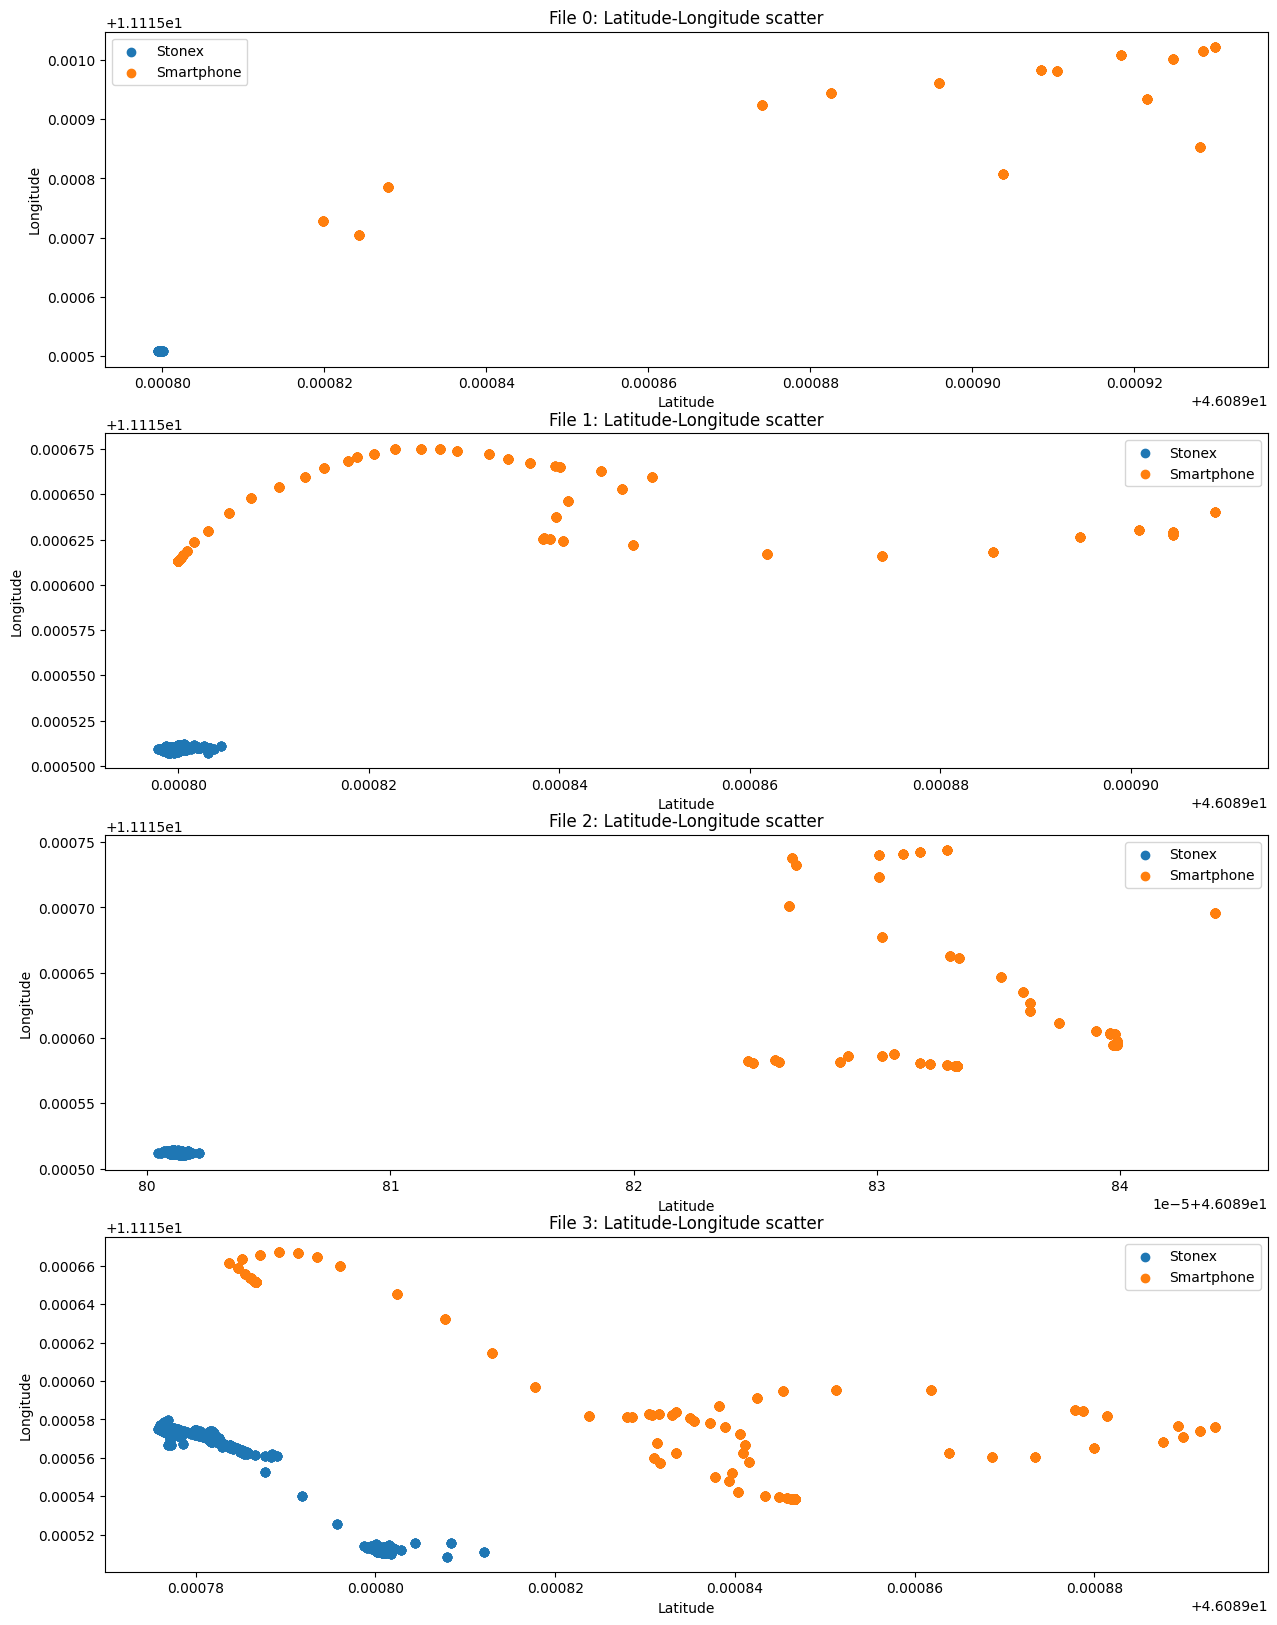

In [38]:
scatter_latitude_longitude_data(stonex_dataframe_list, smartphone_dataframe_list)